In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# import the file
fdi = pd.read_csv('time_series_fdi.csv')

In [27]:
# create a new dataframe just for year on year changes

fdi_yoy = fdi.copy()
fdi_yoy = fdi_yoy.sort_values(by='year', ascending=False)

# Calculate YoY changes for each column except year
for col in ['net_flows', 'investment_income', 'investment_position']:
    fdi_yoy[f'{col}_yoy'] = fdi_yoy[col].pct_change(periods=-1) * 100

In [28]:
fdi_yoy

,year,net_flows,investment_income,investment_position,Unnamed: 4,net_flows_yoy,investment_income_yoy,investment_position_yoy
23,2024,51.526,99.800,995.497,NaN,33.421373,12.897205,7.740569
22,2023,38.619,88.399,923.976,NaN,-48.792713,-17.060104,5.188405
21,2022,75.417,106.582,878.401,NaN,49.524168,6.203914,12.329361
20,2021,50.438,100.356,781.987,NaN,279.775619,128.971685,14.167186
19,2020,13.281,43.829,684.949,NaN,-58.963663,-27.570935,-0.411759
18,2019,32.364,60.513,687.781,NaN,5.279594,0.529953,7.513995
17,2018,30.741,60.194,639.713,NaN,-23.944185,2.459616,7.425058
16,2017,40.419,58.749,595.497,NaN,-14.047847,15.456725,8.781278
15,2016,47.025,50.884,547.426,NaN,19.422506,-0.866956,9.252056
14,2015,39.377,51.329,501.067,NaN,10.609551,-17.480145,5.573582


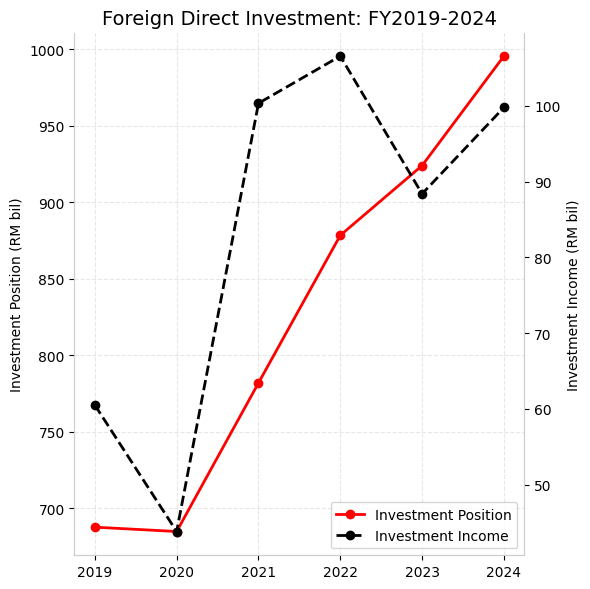

In [18]:
# Filter data from 2019 to 2024
fdi_filter = fdi[fdi['year'] >= 2019]

# Create combo chart
fig, ax1 = plt.subplots(figsize=(6, 6))

# Create primary y-axis for investment position
ax1.plot(fdi_filter['year'], fdi_filter['investment_position'], 
         color='red', marker='o', linewidth=2, label='Investment Position')
ax1.set_ylabel('Investment Position (RM bil)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot investment income on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(fdi_filter['year'], fdi_filter['investment_income'], 
         color='black', marker='o', linestyle='--', linewidth=2, label='Investment Income')
ax2.set_ylabel('Investment Income (RM bil)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set title
ax1.set_title('Foreign Direct Investment: FY2019-2024', fontsize=14, color='black')

# Set spine colors
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('#cecece')
    ax.spines['top'].set_color('white')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--')

# # Get the latest data points
# latest_year = ddi_filter['year'].iloc[-1]
# latest_position = ddi_filter['investment_position'].iloc[-1]
# latest_income = ddi_filter['investment_income'].iloc[-1]

# # Add data callout for investment position (ax1)
# ax1.annotate(f'{latest_position:.0f}', 
#              xy=(latest_year, latest_position),
#              xytext=(-230, 10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add data callout for investment income (ax2)
# ax2.annotate(f'{latest_income:.0f}', 
#              xy=(latest_year, latest_income),
#              xytext=(-230, -10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add horizontal lines to show latest datapoint levels
# ax1.axhline(y=latest_position, color='black', linestyle='--', alpha=0.7, linewidth=1)
# ax2.axhline(y=latest_income, color='black', linestyle='--', alpha=0.7, linewidth=1)


plt.tight_layout()
plt.show()